In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
baseline = pd.read_csv("results/baseline.csv")
baseline

,language,train_f1,val_f1,test_f1
0,mg,0.993728,0.933673,0.960352
1,fo,0.974224,0.897482,0.901099
2,co,0.956204,0.852308,0.813230
3,hsb,0.951443,0.923387,0.854578
4,bh,0.981549,0.888689,0.802120
5,cv,0.977741,0.892617,0.830443


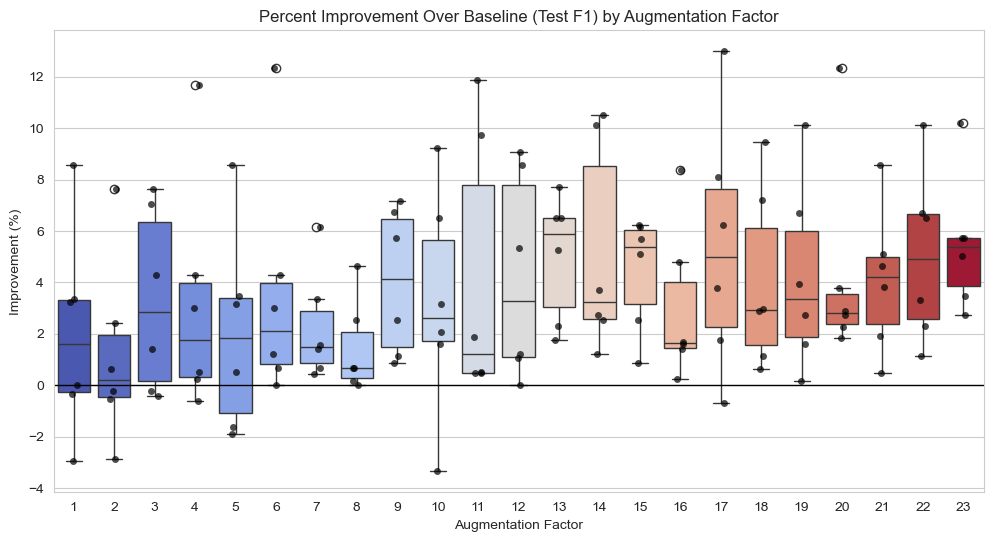

In [13]:
# Load transfer (augmented) data
df = pd.read_csv("results/transfer_learning.csv")

# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="augmentation_factor",
    y="improvement",
    legend=False,
    hue="augmentation_factor",
    palette="coolwarm",
)
sns.stripplot(
    data=df,
    x="augmentation_factor",
    y="improvement",
    color="black",
    jitter=True,
    alpha=0.7,
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title("Percent Improvement Over Baseline (Test F1) by Augmentation Factor")
plt.xlabel("Augmentation Factor")
plt.ylabel("Improvement (%)")

plt.savefig("graphs/transfer_improvement.svg", format="svg", bbox_inches="tight")

plt.show()

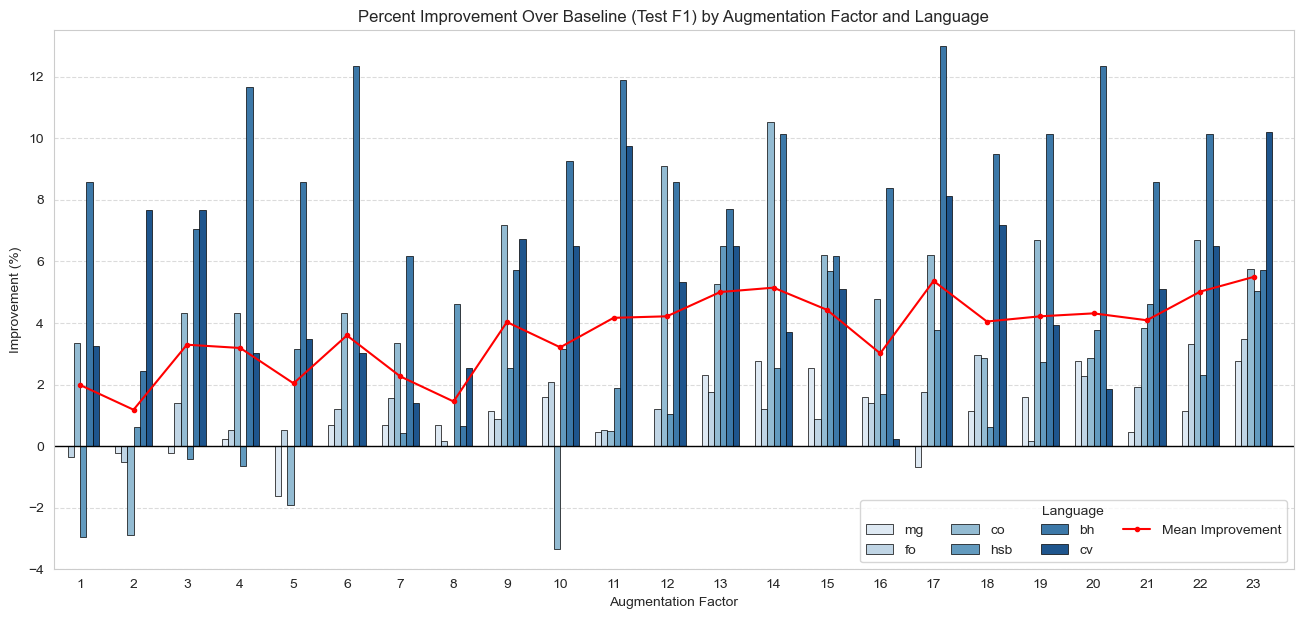

In [14]:
# Visualization using Seaborn
plt.figure(figsize=(16, 7))
ax = sns.barplot(
    data=df,
    x="augmentation_factor",
    y="improvement",
    hue="low_resource_lang",
    palette="Blues",
    dodge=True,
    width=0.7,
    edgecolor="black",
    linewidth=0.5,
)

language_avgs = df.groupby("augmentation_factor")["improvement"].mean()

plt.plot(
    range(len(language_avgs.index)),
    language_avgs,
    color="red",
    marker=".",
    label="Mean Improvement",
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title(
    "Percent Improvement Over Baseline (Test F1) by Augmentation Factor and Language"
)
plt.xlabel("Augmentation Factor")
plt.ylabel("Improvement (%)")
plt.legend(title="Language", loc="lower right", ncol=4)

# Improve readability
plt.xticks(rotation=0)
plt.ylim(-4, 13.5)
plt.xlim(-0.5, max(df["augmentation_factor"]) - 0.25)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig(
    "graphs/detailed_transfer_improvement.svg", format="svg", bbox_inches="tight"
)

plt.show()

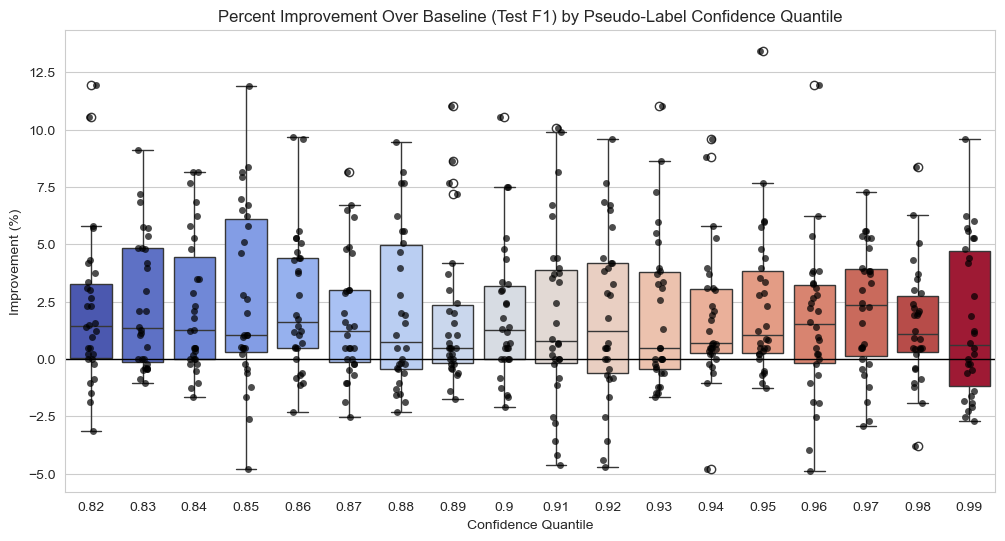

In [15]:
df = pd.read_csv("results/iterative_pseudo_labeling.csv")


# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="confidence_quantile",
    y="improvement",
    legend=False,
    hue="confidence_quantile",
    palette="coolwarm",
)
sns.stripplot(
    data=df,
    x="confidence_quantile",
    y="improvement",
    color="black",
    jitter=True,
    alpha=0.7,
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title(
    "Percent Improvement Over Baseline (Test F1) by Pseudo-Label Confidence Quantile"
)
plt.xlabel("Confidence Quantile")
plt.ylabel("Improvement (%)")

plt.savefig("graphs/all_pseudo_improvement.svg", format="svg", bbox_inches="tight")

plt.show()

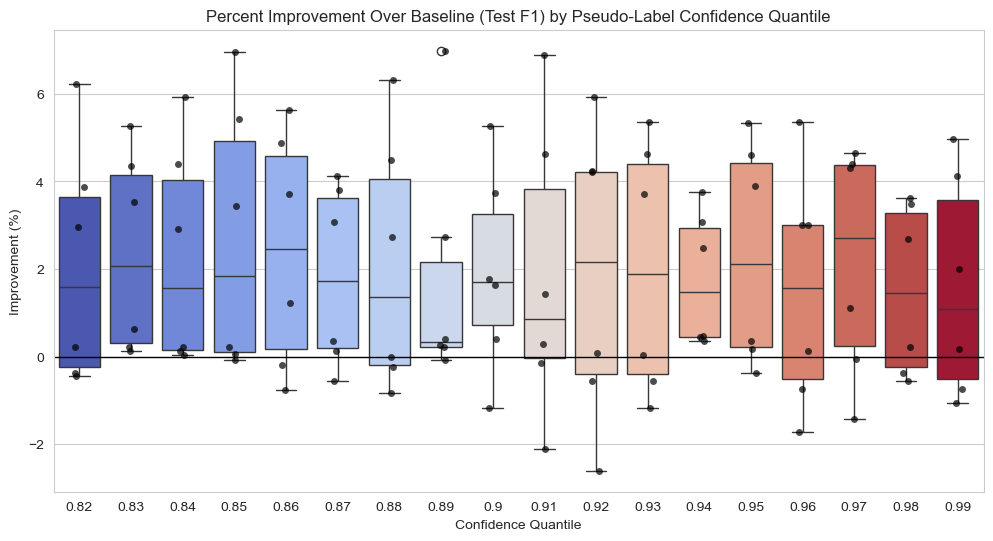

In [16]:
df = pd.read_csv("results/iterative_pseudo_labeling.csv")

per_lang_performance = (
    df.groupby(["language", "confidence_quantile"])["improvement"].mean().reset_index()
)
# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=per_lang_performance,
    x="confidence_quantile",
    y="improvement",
    legend=False,
    hue="confidence_quantile",
    palette="coolwarm",
)
sns.stripplot(
    data=per_lang_performance,
    x="confidence_quantile",
    y="improvement",
    color="black",
    jitter=True,
    alpha=0.7,
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title(
    "Percent Improvement Over Baseline (Test F1) by Pseudo-Label Confidence Quantile"
)
plt.xlabel("Confidence Quantile")
plt.ylabel("Improvement (%)")

plt.savefig("graphs/pseudo_improvement.svg", format="svg", bbox_inches="tight")

plt.show()

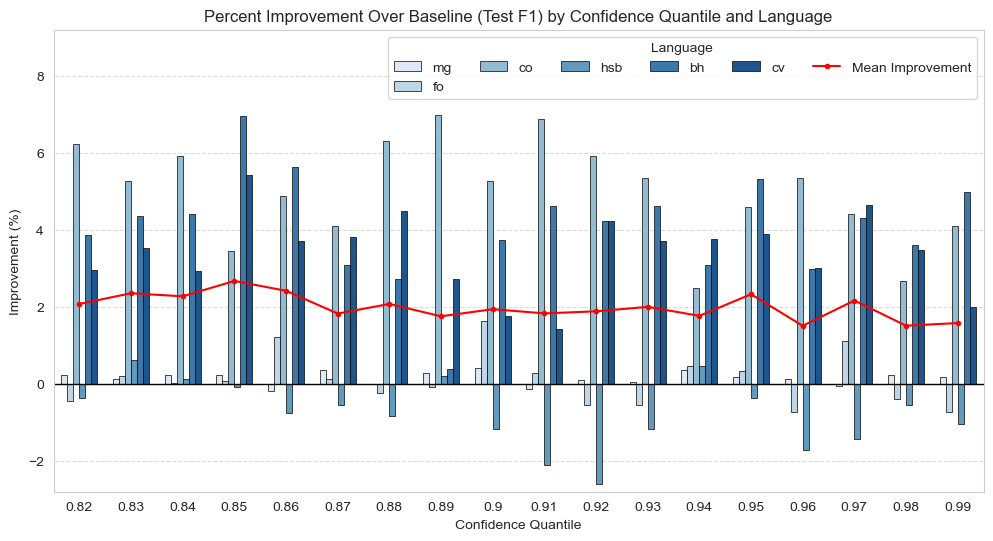

In [17]:
df = pd.read_csv("results/iterative_pseudo_labeling.csv")

# Visualization using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df,
    x="confidence_quantile",
    y="improvement",
    hue="language",
    palette="Blues",
    dodge=True,
    width=0.7,
    edgecolor="black",
    linewidth=0.5,
    errorbar=None,
)

language_avgs = df.groupby("confidence_quantile")["improvement"].mean()
plt.plot(
    range(len(language_avgs.index)),
    language_avgs,
    color="red",
    marker=".",
    label="Mean Improvement",
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title(
    "Percent Improvement Over Baseline (Test F1) by Confidence Quantile and Language"
)

plt.xlabel("Confidence Quantile")
plt.ylabel("Improvement (%)")
plt.legend(title="Language", loc="upper right", ncol=6)

# Improve readability
plt.xticks(rotation=0)
plt.ylim(-2.8, 9.2)
plt.xlim(-0.5, 17.5)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("graphs/detailed_pseudo_improvement.svg", format="svg", bbox_inches="tight")

plt.show()

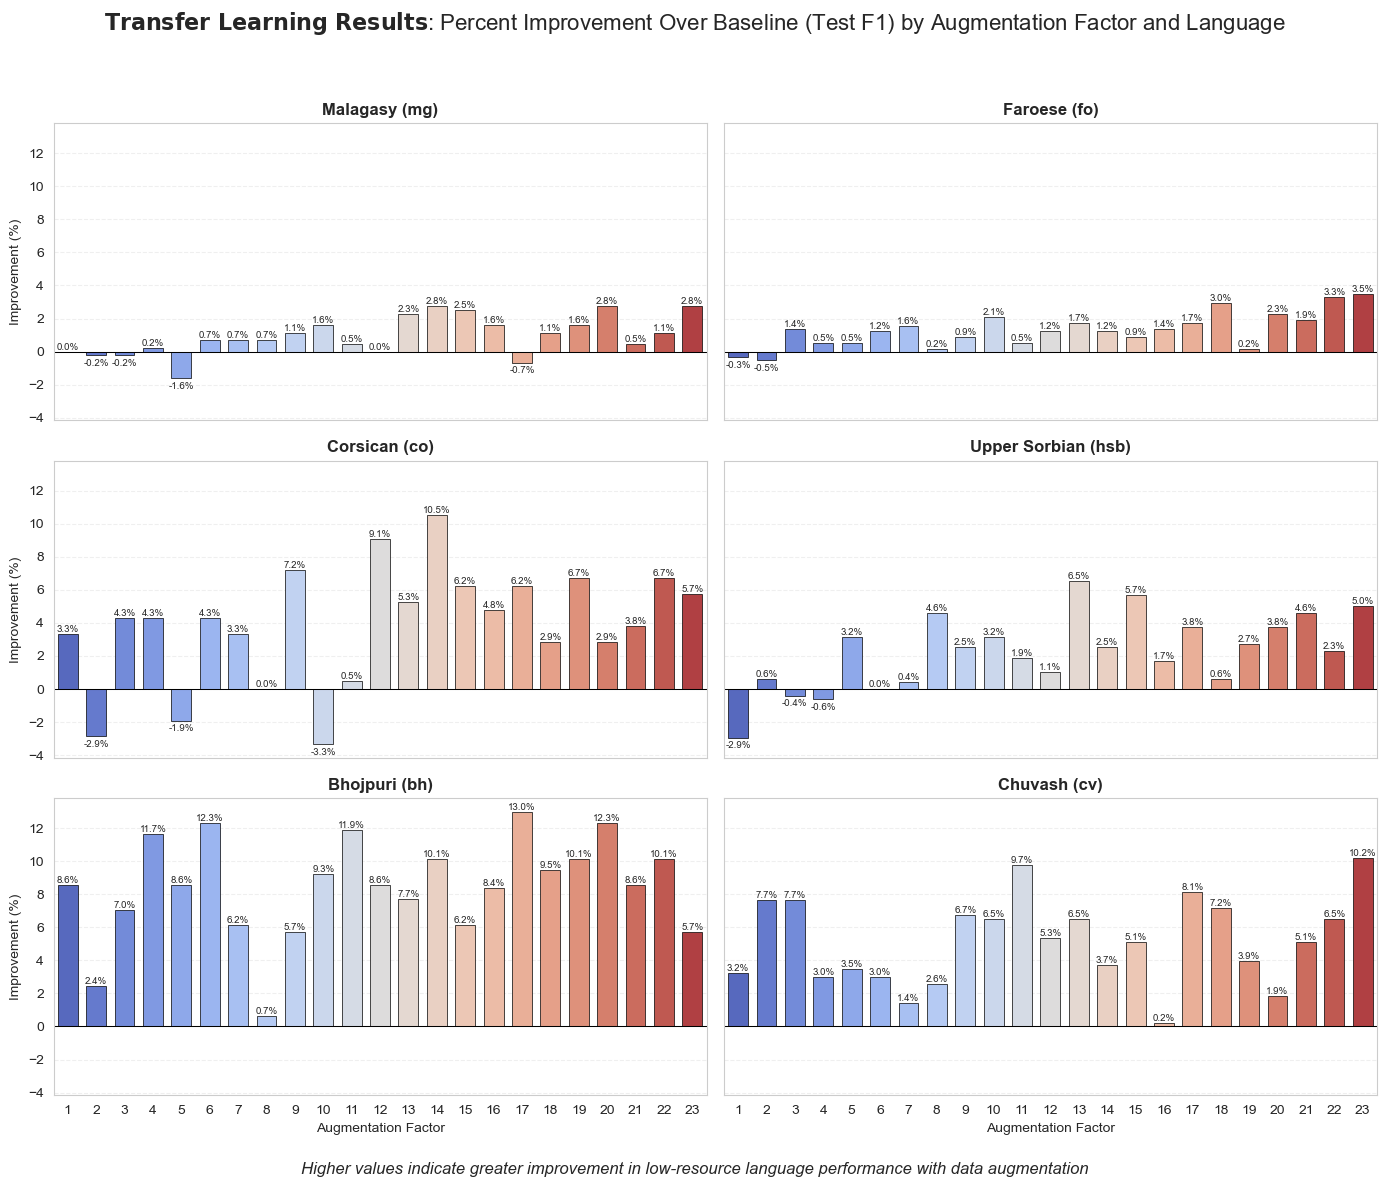

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transfer_results = pd.read_csv("results/transfer_learning.csv")

# Define language full names for better labels
language_names = {
    "mg": "Malagasy",
    "fo": "Faroese",
    "co": "Corsican",
    "hsb": "Upper Sorbian",
    "bh": "Bhojpuri",
    "cv": "Chuvash",
}

# Create a color palette
palette = sns.color_palette(
    "coolwarm", transfer_results["augmentation_factor"].nunique()
)

# Set the style
sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 10})

# Create the figure
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharey=True, sharex=True)

# Flatten the axes for easier iteration
axes_flat = axes.flatten()

for idx, lang in enumerate(["mg", "fo", "co", "hsb", "bh", "cv"]):
    lang_results = transfer_results[transfer_results["low_resource_lang"] == lang]

    # Create the bar plot
    g = sns.barplot(
        data=lang_results,
        x="augmentation_factor",
        y="improvement",
        palette=palette,
        hue="augmentation_factor",
        legend=False,
        edgecolor="black",
        linewidth=0.5,
        ax=axes_flat[idx],
        width=0.7,
    )

    # Add value labels on top of each bar
    for p in g.patches:
        if p.get_height() < 0:
            g.annotate(
                f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2.0, p.get_height() - 0.75),
                ha="center",
                va="bottom",
                fontsize=7,
            )
        else:
            g.annotate(
                f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha="center",
                va="bottom",
                fontsize=7,
            )

    # Customize the grid
    g.grid(axis="y", linestyle="--", alpha=0.3)

    # Set the title and labels
    g.set_title(f"{language_names[lang]} ({lang})", fontsize=12, fontweight="bold")
    g.set_xlabel("Augmentation Factor", fontsize=10)
    g.set_ylabel("Improvement (%)", fontsize=10)
    g.axhline(y=0, color="black", linewidth=0.75)

    # Adjust x-axis ticks if needed
    if len(lang_results["augmentation_factor"].unique()) > 0:
        g.set_xticks(range(len(lang_results["augmentation_factor"].unique())))
        g.set_xticklabels(sorted(lang_results["augmentation_factor"].unique()))

# Add a main title
fig.suptitle(
    r"$\bf{Transfer\ Learning\ Results}$: Percent Improvement Over Baseline (Test F1) by Augmentation Factor and Language",
    fontsize=16,
    y=0.98,
)

# Add an annotation explaining the visualization
fig.text(
    0.5,
    0.01,
    "Higher values indicate greater improvement in low-resource language performance with data augmentation",
    ha="center",
    fontsize=12,
    style="italic",
)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(
    "graphs/transfer_results_lang_breakdown.svg", format="svg", bbox_inches="tight"
)

# Show the plot
plt.show()

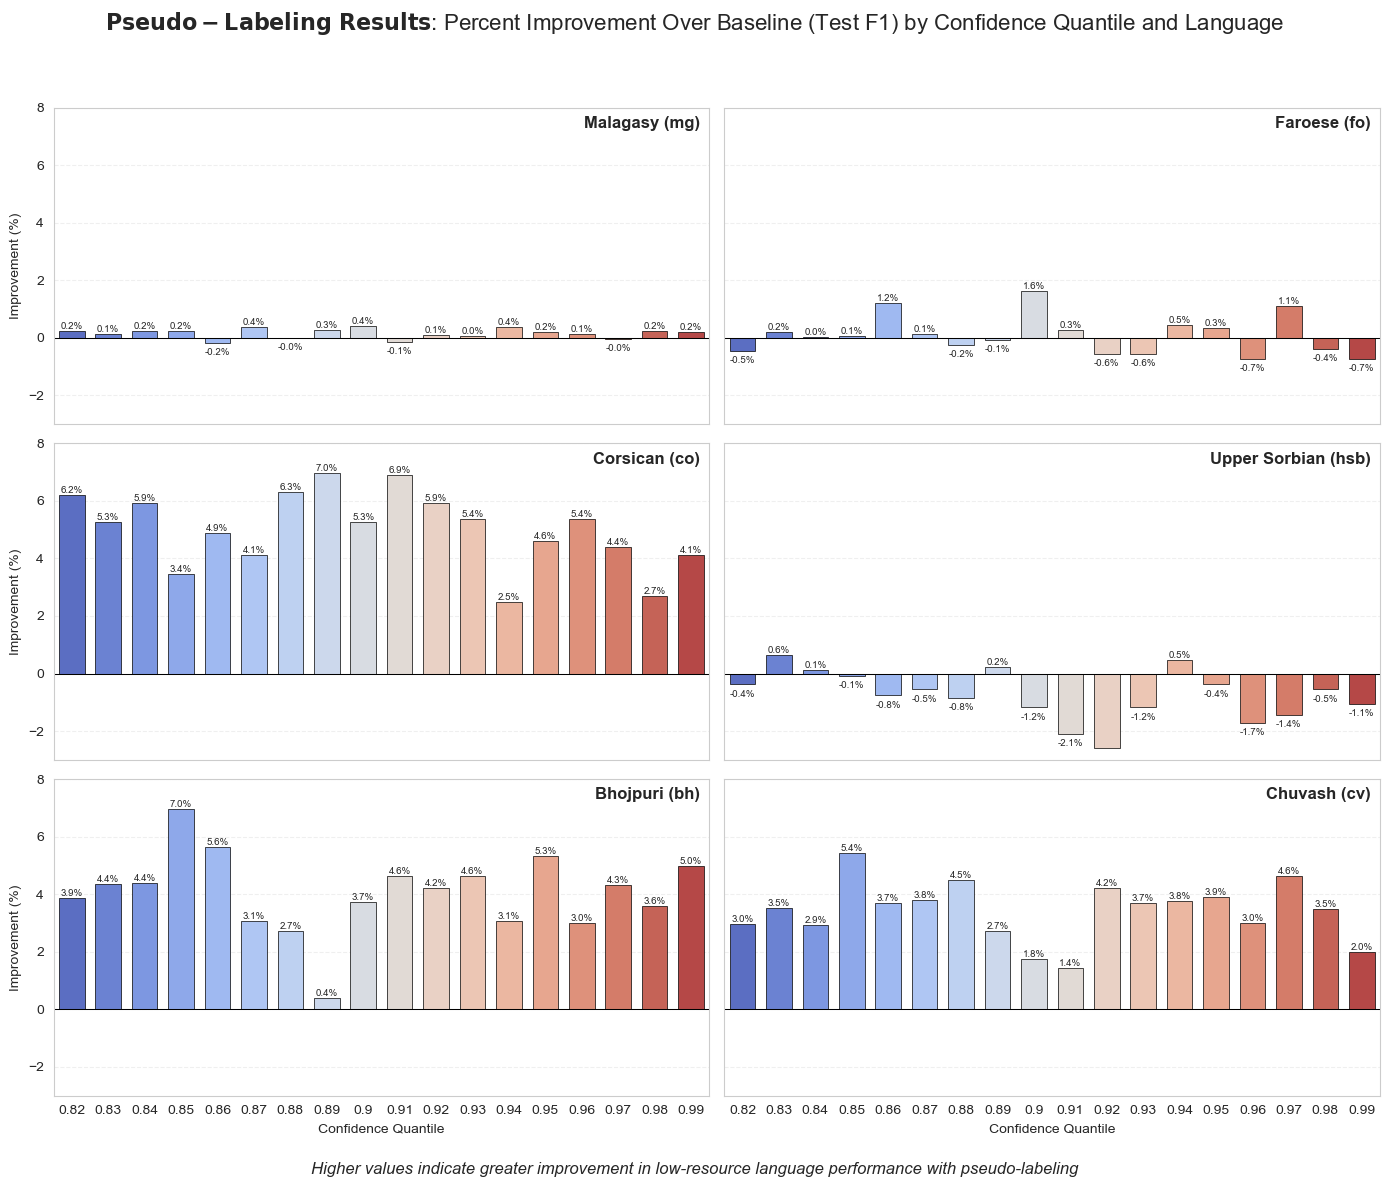

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("results/iterative_pseudo_labeling.csv")

pseudo_results = (
    df.groupby(["language", "confidence_quantile"])[
        ["train_f1", "val_f1", "test_f1", "improvement"]
    ]
    .mean()
    .reset_index()
)

# Define language full names for better labels
language_names = {
    "mg": "Malagasy",
    "fo": "Faroese",
    "co": "Corsican",
    "hsb": "Upper Sorbian",
    "bh": "Bhojpuri",
    "cv": "Chuvash",
}

# Create a color palette
palette = sns.color_palette("coolwarm", pseudo_results["confidence_quantile"].nunique())

# Set the style
sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 10})

# Create the figure
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharey=True, sharex=True)

# Flatten the axes for easier iteration
axes_flat = axes.flatten()

for idx, lang in enumerate(["mg", "fo", "co", "hsb", "bh", "cv"]):
    lang_results = pseudo_results[pseudo_results["language"] == lang]

    # Create the bar plot
    g = sns.barplot(
        data=lang_results,
        x="confidence_quantile",
        y="improvement",
        palette=palette,
        hue="confidence_quantile",
        legend=False,
        edgecolor="black",
        linewidth=0.5,
        ax=axes_flat[idx],
        width=0.7,
    )

    # Add value labels on top of each bar
    for p in g.patches:
        if p.get_height() < 0:
            g.annotate(
                f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2.0, p.get_height() - 0.5),
                ha="center",
                va="bottom",
                fontsize=7,
            )
        else:
            g.annotate(
                f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha="center",
                va="bottom",
                fontsize=7,
            )

    # Customize the grid
    g.grid(axis="y", linestyle="--", alpha=0.3)

    # Set the title and labels
    g.set_title(
        f"{language_names[lang]} ({lang})  ",
        fontsize=12,
        fontweight="bold",
        y=0.91,
        loc="right",
    )
    g.set_xlabel("Confidence Quantile", fontsize=10)
    g.set_ylabel("Improvement (%)", fontsize=10)
    g.set_ylim((-3, 8))
    g.axhline(y=0, color="black", linewidth=0.75)

    # Adjust x-axis ticks if needed
    if len(lang_results["confidence_quantile"].unique()) > 0:
        g.set_xticks(range(len(lang_results["confidence_quantile"].unique())))
        g.set_xticklabels(sorted(lang_results["confidence_quantile"].unique()))

# Add a main title
fig.suptitle(
    r"$\bf{Pseudo-Labeling\ Results}$: Percent Improvement Over Baseline (Test F1) by Confidence Quantile and Language",
    fontsize=16,
    y=0.98,
)

# Add an annotation explaining the visualization
fig.text(
    0.5,
    0.01,
    "Higher values indicate greater improvement in low-resource language performance with pseudo-labeling",
    ha="center",
    fontsize=12,
    style="italic",
)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(
    "graphs/1pseudo_results_lang_breakdown.svg", format="svg", bbox_inches="tight"
)


# Show the plot
plt.show()